Total values loaded: 3000
First 5 values: [344700.0, 176500.0, 270500.0, 330000.0, 81700.0]


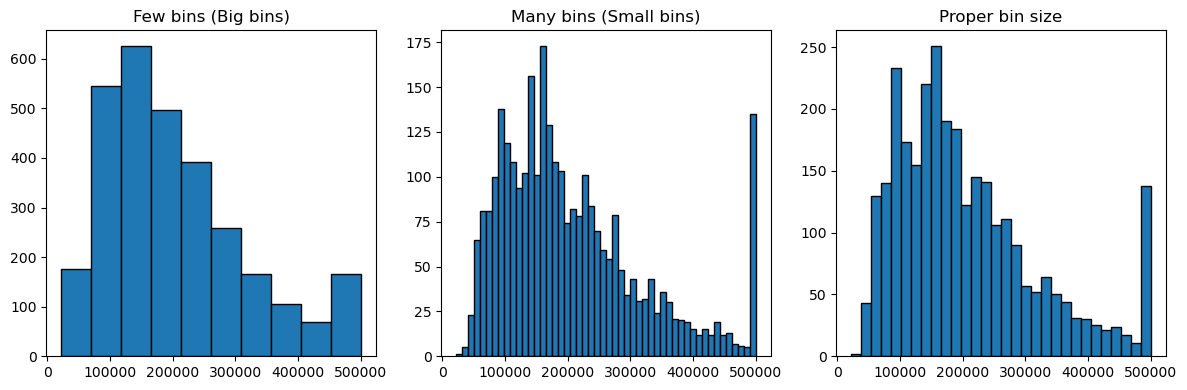

In [47]:
#Plot a histogram for a numerical column and explain how the choice of bin size affects the shape of the distribution
import csv
import matplotlib.pyplot as plt

# List to store the numerical values
house_values = []

# Open the CSV file
filename="C:/Users/shres/OneDrive/Documents/california_housing_test.csv"
with open(filename, "r") as file:
    reader = csv.DictReader(file)   # Reads each row as a dictionary

    for row in reader:
        if row["median_house_value"] !="": # column name
            house_values.append(float(row["median_house_value"]))  # convert to number

# Print result
print("Total values loaded:", len(house_values))
print("First 5 values:", house_values[:5])

plt.figure(figsize=(12, 4))
# Few bins
plt.subplot(1,3,1)
plt.hist(house_values, bins=10,edgecolor='black')
plt.title("Few bins (Big bins)")

# Many bins
plt.subplot(1,3,2)
plt.hist(house_values, bins=50,edgecolor='black')
plt.title("Many bins (Small bins)")

# Proper bins
plt.subplot(1,3,3)
plt.hist(house_values, bins=30,edgecolor='black')
plt.title("Proper bin size")

plt.tight_layout()
plt.show()

#Left (few bins) - Bars are wide, details are hidden
#Middle (many bins)- Bars are thin, graph looks noisy
#Right (proper bins) - Clear and balanced shape

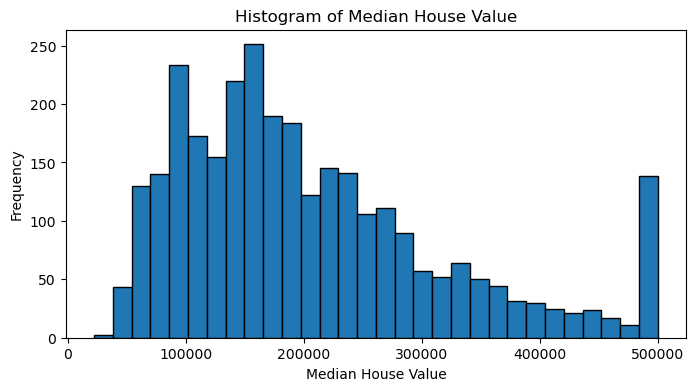

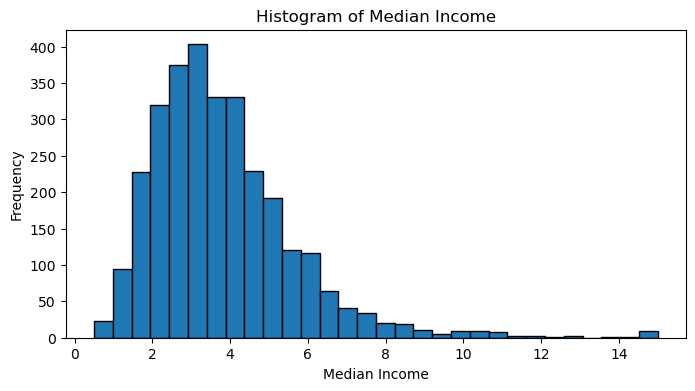

Comparison summary:
Median House Value -> Min: 22500.0, Max: 500001.0,Mean: 205846.27
Median Income      -> Min: 0.4999, Max: 15.0001,Mean: 3.81


In [48]:
#Write code to plot histograms for two different columns on separate figures and compare their distributions.
import csv
import matplotlib.pyplot as plt


# File path
filename = "C:/Users/shres/OneDrive/Documents/california_housing_test.csv"

# Lists to store values
median_house_values = []
median_incomes = []

# Read CSV file
with open(filename, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["median_house_value"] != "":
            median_house_values.append(float(row["median_house_value"]))
        if row["median_income"] != "":
            median_incomes.append(float(row["median_income"]))

# Function to plot histogram
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()
    
# function for mmean
def mean(data):
    x=sum(data)/len(data)
    return x
    
# Plot histograms
plot_histogram(median_house_values, "Median House Value")
plot_histogram(median_incomes, "Median Income")
mean_median_house_value=mean(median_house_values)
mean_median_incomes=mean(median_incomes)

# Compare distributions
print("Comparison summary:")
print(f"Median House Value -> Min: {min(median_house_values)}, Max: {max(median_house_values)},Mean: {mean_median_house_value:.2f}")
print(f"Median Income      -> Min: {min(median_incomes)}, Max: {max(median_incomes)},Mean: {mean_median_incomes:.2f}")


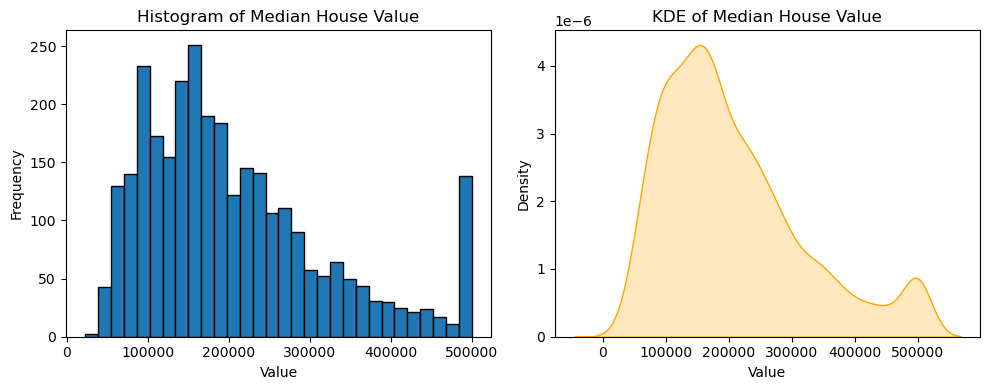

In [49]:
#Plot a density (KDE) curve and explain how it differs from a histogram.
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(house_values, bins=30, edgecolor='black')
plt.title("Histogram of Median House Value")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot KDE
plt.subplot(1,2,2)
sns.kdeplot(house_values, fill=True, color='orange')
plt.title("KDE of Median House Value")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

#Histogram: Shows bars representing counts of house values in each range. Blocky, depends on bin size.
#KDE: Shows a smooth curve representing density of values. Continuous, highlights peaks and trends, not affected by bins.
#Key idea: Histogram = rough counts, KDE = smooth distribution shape.

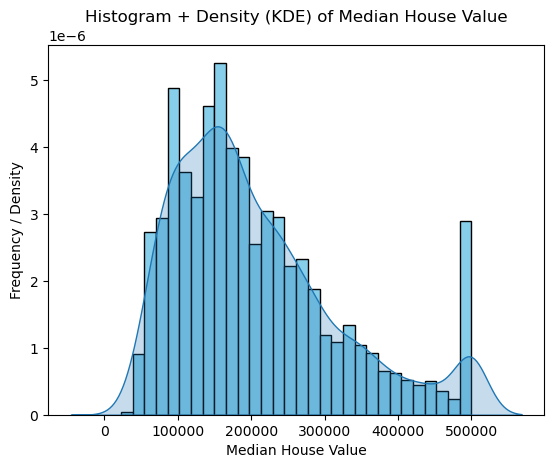

In [50]:
#Plot both histogram and density plot for the same data and explain what additional insight the density plot gives.

# Plot histogram + density together
plt.hist(house_values, bins=30,color='skyblue',density=True, edgecolor="black")
sns.kdeplot(house_values,fill=2)
plt.xlabel("Median House Value")
plt.ylabel("Frequency / Density")
plt.title("Histogram + Density (KDE) of Median House Value")
plt.show()

#Histogram: Shows counts of houses in each price range (bars).
#KDE (density curve): Shows a smooth line of where most houses are concentrated.

#Extra insight from KDE:
# -You can see peaks clearly (most common house prices).
# -Shows trends and clusters that histogram bars might hide.
#- Reveals skewness (long tail toward higher prices).

Lower quartile (Q1): 121200.0
Upper quartile (Q3): 264200.0


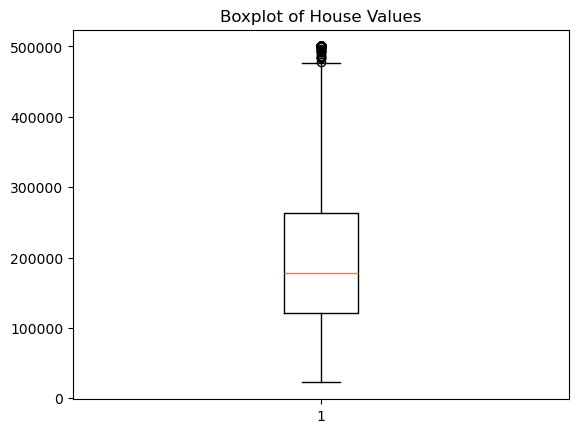

In [51]:
#Create a boxplot for a numerical column and identify the lower and upper quartiles.
sorted_data = sorted(house_values)
n = len(sorted_data)
# Calculate Q1, Q3, IQR 
q1 = sorted_data[n // 4]        # 25th percentile
q3 = sorted_data[(3 * n) // 4]  # 75th percentile


print("Lower quartile (Q1):", q1)
print("Upper quartile (Q3):", q3)

# Create boxplot
plt.boxplot(house_values)
plt.title("Boxplot of House Values")
plt.show()

In [52]:
#From the boxplot, extract the IQR value programmatically and print it.
# Calculate IQR
iqr = q3 - q1

print("Lower quartile (Q1):", q1)
print("Upper quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)

Lower quartile (Q1): 121200.0
Upper quartile (Q3): 264200.0
Interquartile Range (IQR): 143000.0


In [53]:
#Identify outliers using the boxplot rule (1.5 × IQR) and print their count.

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in house_values if x < lower_bound or x > upper_bound]

print("Lower quartile (Q1):", q1)
print("Upper quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Outliers:", outliers)
print("Number of outliers:", len(outliers))

Lower quartile (Q1): 121200.0
Upper quartile (Q3): 264200.0
Interquartile Range (IQR): 143000.0
Outliers: [484700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 483800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 493200.0, 500001.0, 500001.0, 500001.0, 495500.0, 489800.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 495800.0, 500001.0, 492300.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 494700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500000.0, 487100.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500000.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500

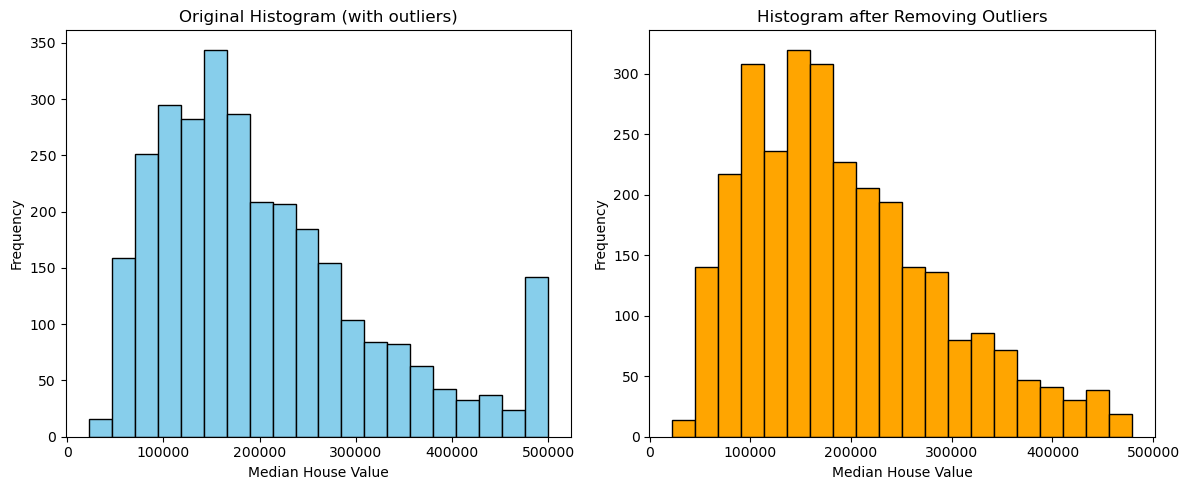

In [54]:
#Plot a boxplot before and after removing outliers and compare the visual difference.
clean_data = [x for x in house_values if lower_bound <= x <= upper_bound]
plt.figure(figsize=(12,5))

# Original histogram
plt.subplot(1,2,1)
plt.hist(house_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Original Histogram (with outliers)")

# Histogram after removing outliers
plt.subplot(1,2,2)
plt.hist(clean_data, bins=20, color='orange', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram after Removing Outliers")

plt.tight_layout()
plt.show()

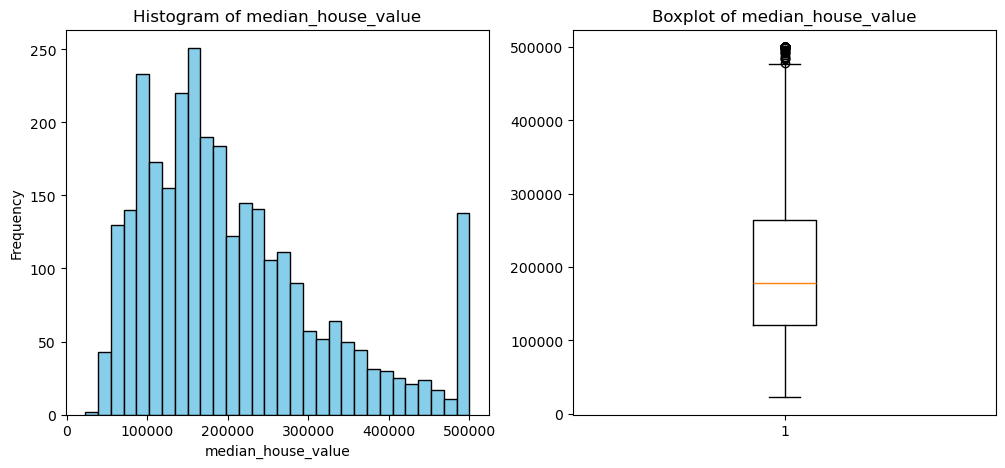

In [55]:
#Write a function that takes a column name and automatically plots its histogram and boxplot.
import csv
import matplotlib.pyplot as plt

# Function to plot histogram and boxplot
def plot_column(filename, column_name):
    data = []

    # Read CSV and extract the column values
    with open(filename, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row[column_name]:
                data.append(float(row[column_name]))
    
    if not data:
        print("No data found in this column!")
        return
    
    # Plot histogram and boxplot side by side
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(data)
    plt.title(f"Boxplot of {column_name}")

    plt.show()


filename = "C:/Users/shres/OneDrive/Documents/california_housing_test.csv"
plot_column(filename, "median_house_value")


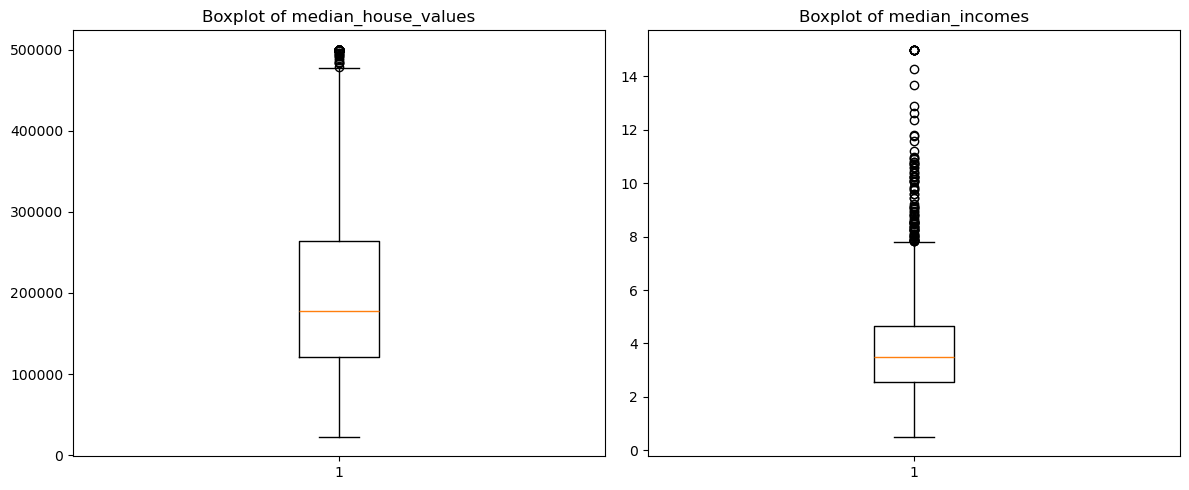


Comparison of Variability:
Variability is about how spread out the data is.
The Median House Values boxplot has a larger spread (wider box + longer whiskers) than Median Incomes.
Even though Median Incomes have many outliers, the main bulk of the data is more concentrated, so its variability is smaller.
Conclusion:
Median House Values have higher variability because the data points are more spread out over a larger range, and the IQR and whiskers are wider compared to Median Incomes.



In [56]:
# Lists to store values
median_house_values = []
median_incomes = []

# Read CSV file
with open(filename, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["median_house_value"] != "":
            median_house_values.append(float(row["median_house_value"]))
        if row["median_income"] != "":
            median_incomes.append(float(row["median_income"]))

plt.figure(figsize=(12,5))
# Boxplot
plt.subplot(1,2,1)
plt.boxplot(median_house_values)
plt.title(f"Boxplot of median_house_values")

plt.subplot(1,2,2)
plt.boxplot(median_incomes)
plt.title(f"Boxplot of median_incomes")

plt.tight_layout()
plt.show()

comparison_text = """
Comparison of Variability:
Variability is about how spread out the data is.
The Median House Values boxplot has a larger spread (wider box + longer whiskers) than Median Incomes.
Even though Median Incomes have many outliers, the main bulk of the data is more concentrated, so its variability is smaller.
Conclusion:
Median House Values have higher variability because the data points are more spread out over a larger range, and the IQR and whiskers are wider compared to Median Incomes.
"""

print(comparison_text)


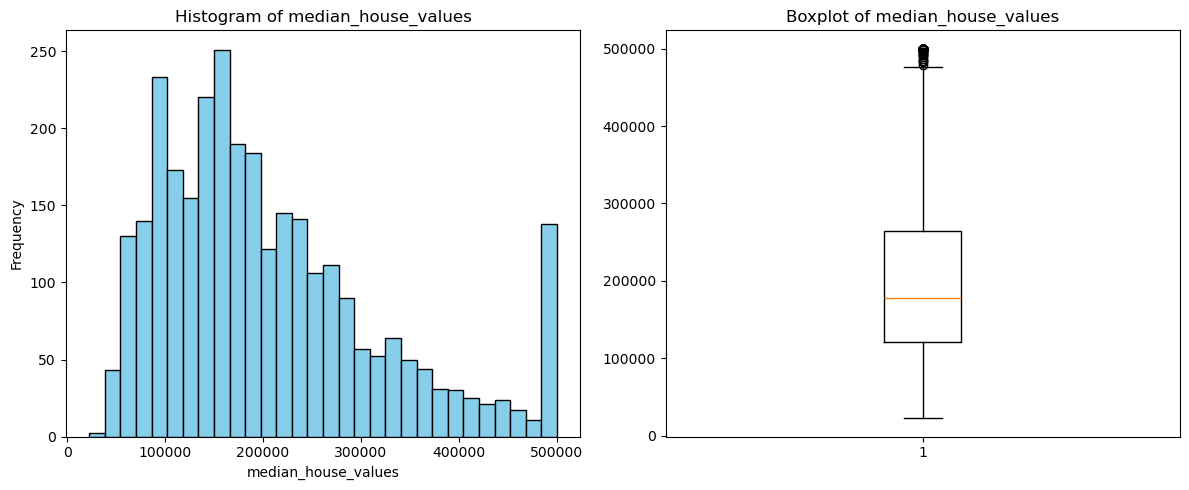

In [57]:
#Use subplots to display histogram and boxplot for the same column side-by-side.

# Plot histogram and boxplot side by side
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
plt.hist(median_house_values, bins=30, color='skyblue', edgecolor='black')
plt.title(f"Histogram of median_house_values")
plt.xlabel("median_house_values")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1,2,2)
plt.boxplot(median_house_values)
plt.title(f"Boxplot of median_house_values")

plt.tight_layout()
plt.show()

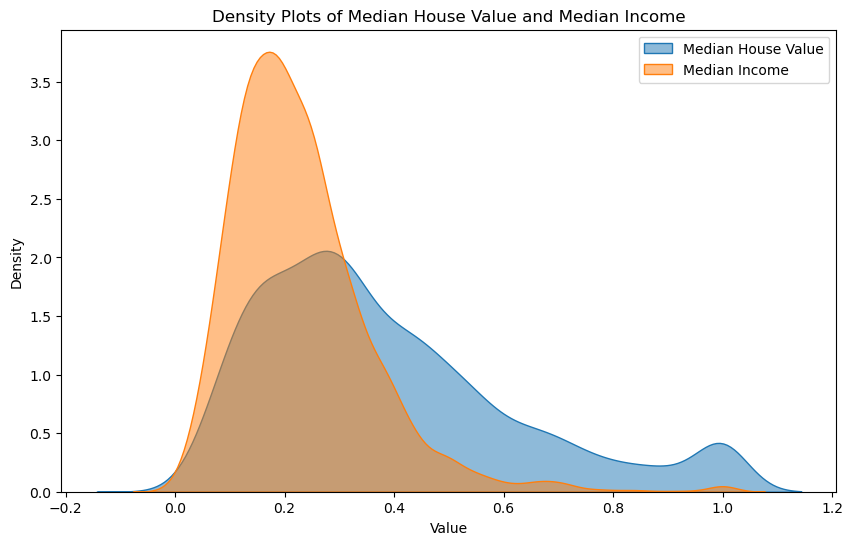

In [58]:
#Plot density plots for two different columns on the same figure and analyze overlap.
import seaborn as sns

# Clean data
clean_mdn_house = [x for x in median_house_values  if x is not None]
clean_mdn_income = [x for x in median_incomes if x is not None]

# Min-max normalization 
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

house_norm = normalize(clean_mdn_house)
income_norm = normalize(clean_mdn_income)

# Plot density plots for two columns
plt.figure(figsize=(10,6))

sns.kdeplot(house_norm, label='Median House Value', fill=True, alpha=0.5)
sns.kdeplot(income_norm, label='Median Income', fill=True, alpha=0.5)

plt.title('Density Plots of Median House Value and Median Income')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

#The density plots show partial overlap, indicating that median income and median house value share common ranges. 
#However, median house values are more spread out and right-skewed, while median incomes are more concentrated. 
#This suggests higher variability in house values compared to incomes.

***Explain how skewness is visible in histograms and boxplots.***

->Skewness is visible in histograms through the direction of the tail <br>
and in boxplots through unequal whisker lengths and the median’s position within the box<br>

| Plot type | How skewness appears            |
| --------- | ------------------------------- |
| Histogram | Longer tail on one side         |
| Boxplot   | Longer whisker + shifted median |


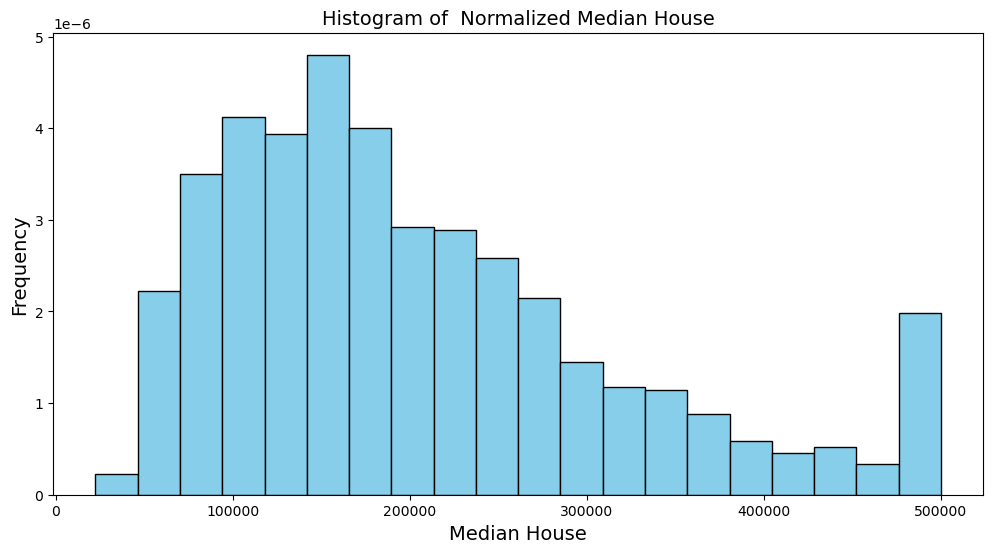

In [63]:
# Modify your histogram code to normalize the frequency (probability density).
import matplotlib.pyplot as plt

# Clean data

clean_mdn_house = [x for x in median_house_values  if x is not None]

# Plot histogram
plt.figure(figsize=(12,6))
plt.hist(clean_mdn_house, bins=20, edgecolor='black', color='skyblue',density=True)  # density = True normalizes the frequency
plt.title(f"Histogram of  Normalized Median House",fontsize=14)
plt.xlabel("Median House",fontsize =14)
plt.ylabel("Frequency",fontsize=14)
plt.show()


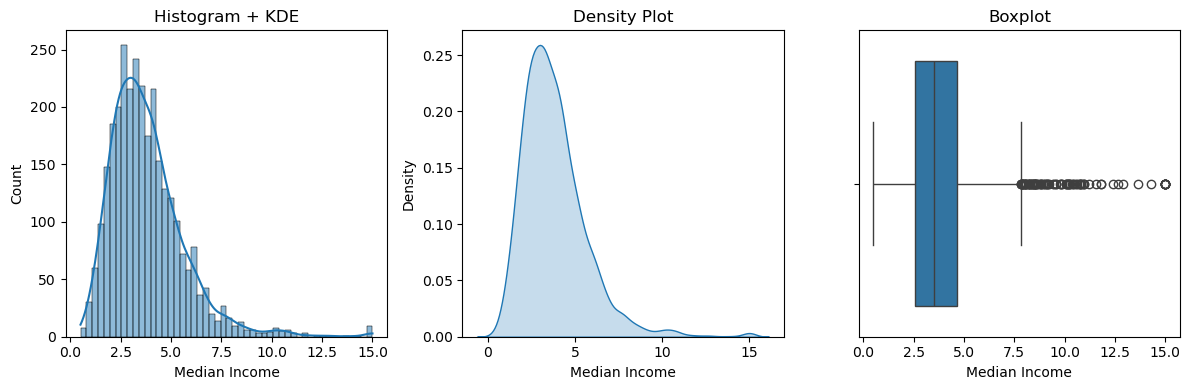


Visual Detection of Normality:

1 Histogram + KDE
- The histogram is not symmetric.
- There is a long tail to the right.
- The KDE curve is not bell-shaped.
This indicates right (positive) skewness.

2 Density plot
- The peak is toward the left.
- The curve stretches far to the right.
A normal distribution should be symmetric, which this is not.

3 Boxplot
- The median is closer to the bottom of the box.
- The upper whisker is much longer.
- There are many outliers on the right side.
These are clear signs of right skewness.

Final Conclusion:
The distribution is not approximately normal because the histogram and density plot are right-skewed, and the boxplot shows a long upper whisker with many right-side outliers.



In [60]:
#Write code to detect whether a distribution is approximately normal using visualization only.
plt.figure(figsize=(12,4))

# Histogram + KDE
plt.subplot(1,3,1)
sns.histplot(median_incomes, kde=True)
plt.title('Histogram + KDE')
plt.xlabel('Median Income')

# Density plot
plt.subplot(1,3,2)
sns.kdeplot(median_incomes, fill=True)
plt.title('Density Plot')
plt.xlabel('Median Income')

# Boxplot
plt.subplot(1,3,3)
sns.boxplot(x=median_incomes)
plt.title('Boxplot')
plt.xlabel('Median Income')

plt.tight_layout()
plt.show()

analysis = """
Visual Detection of Normality:

1 Histogram + KDE
- The histogram is not symmetric.
- There is a long tail to the right.
- The KDE curve is not bell-shaped.
This indicates right (positive) skewness.

2 Density plot
- The peak is toward the left.
- The curve stretches far to the right.
A normal distribution should be symmetric, which this is not.

3 Boxplot
- The median is closer to the bottom of the box.
- The upper whisker is much longer.
- There are many outliers on the right side.
These are clear signs of right skewness.

Final Conclusion:
The distribution is not approximately normal because the histogram and density plot are right-skewed, and the boxplot shows a long upper whisker with many right-side outliers.
"""

print(analysis)
